In [1]:
import time, warnings
from tensorflow.keras.layers import Dense, Activation, Dropout, LSTM, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from numpy import newaxis # 차원을 분해한 후 한 단계 추가

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [4]:
data_file = 'sp500.csv' #추세그래프 그리기. 
df = pd.read_csv(data_file, names=['price'])

In [5]:
len(df)

4171

In [6]:
# price = df['price'].tolist()
price = df[['price']].values #tolist()




window_size = 50

In [7]:
type(price)

numpy.ndarray

In [8]:
## 훈련, 검증, 테스트용 데이터 작성
## 과거 30일분의 주가로부터 당일의 주가 계산
def data_split(data, start, end, window_size ):
    length = abs(start - end) - window_size
    
    #초기 선언
    X=np.zeros((length, window_size)) # 240 이면 30이다?
    y=np.zeros((length, 1))
   
    for i in range(length):
        j = start + i 
        k = j + window_size
        X[i] = data[j:k, 0]
        y[i] = data[k,0]
    
    return X, y 

In [9]:
# len(price)
# print(price[3500])

In [10]:
## 훈련, 검증, 테스트용 데이터
(X_train, y_train) = data_split(price, 0, 3000, window_size) #트레인 데이터 !!!! 는 과거 300일부터 과거 60일까지 !!!
(X_valid, y_valid) = data_split(price, 3000, 3700, window_size)
(X_test, y_test) = data_split(price, 3700, 4171, window_size)
# print(X_test[-1])

In [11]:
print(X_train.shape)
print(y_train.shape)

print(X_valid.shape)
print(y_valid.shape)

print(X_test.shape)
print(y_test.shape)

# print(X_test[-50])

(2950, 50)
(2950, 1)
(650, 50)
(650, 1)
(421, 50)
(421, 1)


In [12]:
## 표준화
## X만 차원을 변환 (2차원 -> 3차원)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_valid_std =scaler.fit_transform(X_valid)
X_test_std =scaler.fit_transform(X_test)

In [13]:
# scaler transform 사용


y_train_std = scaler.fit_transform(y_train)
y_valid_std =scaler.fit_transform(y_valid)
y_test_std =scaler.fit_transform(y_test)

In [14]:
# reshape (data개수, sequence, feature개수)
# reshape(-1(지금가지고 있는 값 그대로 쓰겠다),30(window_size를 위에서 30으로 지정함.),1(종가 하나만 다루므로 1))

X_valid_std=X_valid_std.reshape(-1, window_size, 1)
X_test_std=X_test_std.reshape(-1, window_size, 1)
X_train_std=X_train_std.reshape(-1, window_size, 1)

X_train_std

array([[[ 1.42769436],
        [ 1.12902949],
        [ 1.14415206],
        ...,
        [ 1.13332251],
        [ 1.07167714],
        [ 0.93929076]],

       [[ 1.12807437],
        [ 1.14347804],
        [ 1.15135099],
        ...,
        [ 1.07119108],
        [ 0.93886807],
        [ 1.11837347]],

       [[ 1.14251812],
        [ 1.15067543],
        [ 1.35561231],
        ...,
        [ 0.93840847],
        [ 1.11791896],
        [ 1.4784387 ]],

       ...,

       [[ 0.06850246],
        [-0.12066299],
        [-0.32011355],
        ...,
        [-0.14946588],
        [ 0.0346582 ],
        [ 0.04925059]],

       [[-0.12120319],
        [-0.32047599],
        [-0.28320472],
        ...,
        [ 0.03437886],
        [ 0.04898603],
        [ 0.33027873]],

       [[-0.32094984],
        [-0.28357502],
        [-0.14072744],
        ...,
        [ 0.04870383],
        [ 0.32996424],
        [ 0.31735912]]])

In [15]:
## 훈련 RNN (model -> LSTM)
# Input -> LSTM(128) -> Dense
# compile -> loss=mse, optimizer=adam, metrics = 'accuracy'




i = Input(shape=(window_size, 1))

x = LSTM(128)(i)
x = Dense(1)(x)
model = Model(i,x)

model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])


model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50, 1)]           0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Model 학습, epochs = 10


r=model.fit(X_train_std, y_train_std, epochs=100, batch_size=64, shuffle=True, validation_data=((X_valid_std, y_valid_std)))

Train on 2950 samples, validate on 650 samples
Epoch 1/100
2950/2950 [==============================] - 6s 2ms/sample - loss: 0.1169 - accuracy: 0.0000e+00 - val_loss: 0.0113 - val_accuracy: 0.0000e+00
Epoch 2/100
2950/2950 [==============================] - 3s 1ms/sample - loss: 0.0219 - accuracy: 0.0000e+00 - val_loss: 0.0097 - val_accuracy: 0.0000e+00
Epoch 3/100
2950/2950 [==============================] - 3s 1ms/sample - loss: 0.0199 - accuracy: 0.0000e+00 - val_loss: 0.0095 - val_accuracy: 0.0000e+00
Epoch 4/100
2950/2950 [==============================] - 3s 1ms/sample - loss: 0.0181 - accuracy: 0.0000e+00 - val_loss: 0.0090 - val_accuracy: 0.0000e+00 - loss: 0.0181 - accura
Epoch 5/100
2950/2950 [==============================] - 3s 1ms/sample - loss: 0.0170 - accuracy: 0.0000e+00 - val_loss: 0.0081 - val_accuracy: 0.0000e+00
Epoch 6/100
2950/2950 [==============================] - 3s 1ms/sample - loss: 0.0167 - accuracy: 0.0000e+00 - val_loss: 0.0078 - val_accuracy: 0.0000e+00

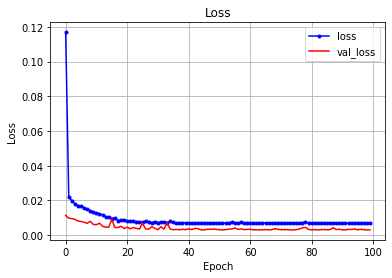

In [17]:
plt.title('Loss')
plt.plot(r.history['loss'],'b',marker='.', label = 'loss')
plt.plot(r.history['val_loss'],'r', label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.grid(True)
plt.show()

In [18]:
p = model.predict(X_test_std)

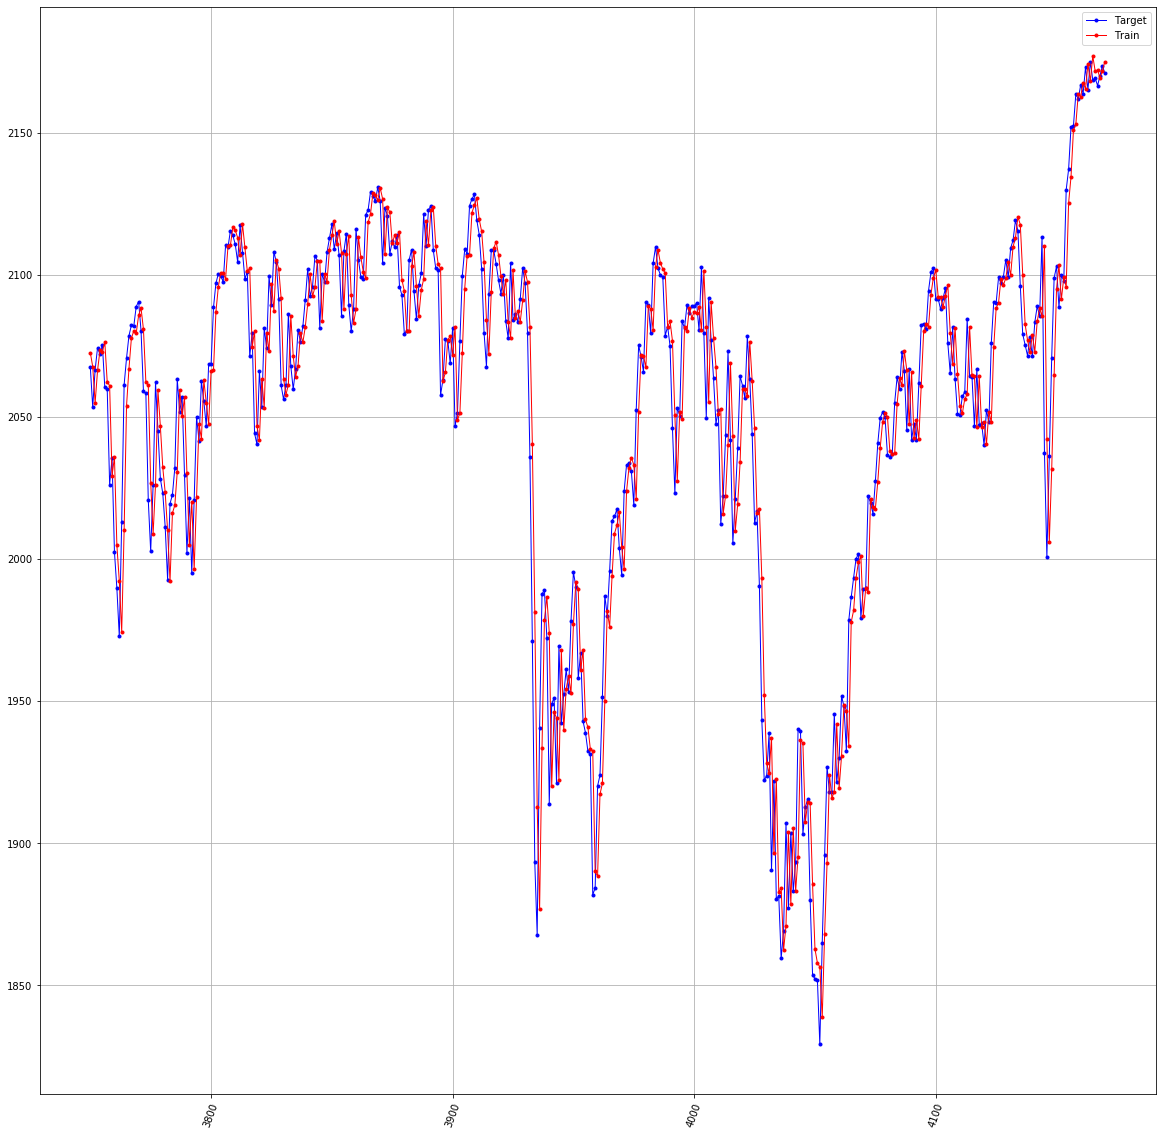

In [19]:
## 예측치
p = model.predict(X_test_std)
df_predict_std = pd.DataFrame(p, columns=['정확도'])

## 예측치 그래프로 표시
predict = scaler.inverse_transform(df_predict_std['정확도'].values)

pre_date = df.index[-len(y_test):].values
plt.figure(figsize=(20, 20))
plt.plot(pre_date, y_test, 'b', marker='.', label='Target', linewidth=1) # 정답 데이터. 
plt.plot(pre_date, predict, 'r', marker='.', label='Train', linewidth=1) #예측한 데이터
plt.xticks(rotation=70) # x축 이름들 각도. 
plt.grid()
plt.legend()
plt.show()

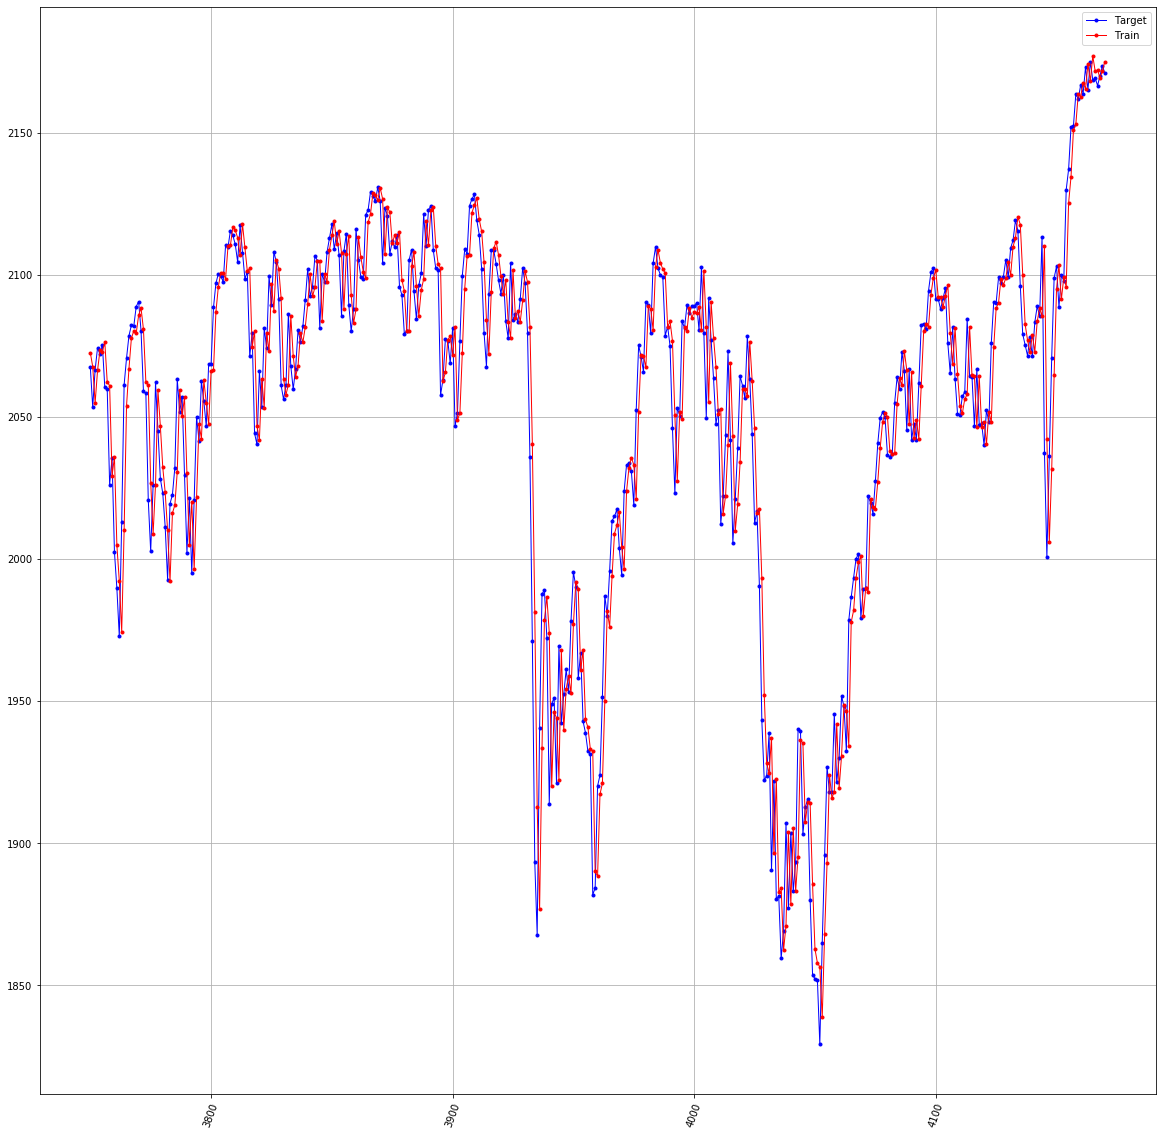

In [20]:
## 예측치
p = model.predict(X_test_std)
df_predict_std = pd.DataFrame(p, columns=['정확도'])

## 예측치 그래프로 표시
predict = scaler.inverse_transform(df_predict_std['정확도'].values)

pre_date = df.index[-len(y_test):].values
plt.figure(figsize=(20, 20))
plt.plot(pre_date, y_test, 'b', marker='.', label='Target', linewidth=1) # 정답 데이터. 
plt.plot(pre_date, predict, 'r', marker='.', label='Train', linewidth=1) #예측한 데이터
plt.xticks(rotation=70) # x축 이름들 각도. 
plt.grid()
plt.legend()
plt.show()